In [1]:
import glob

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import numpy as np

In [2]:
files = sorted(glob.glob('../data/raw/prices/EPEXSPOTDE/*.csv'))

In [3]:
!head {files[-1]}

time,low,high,last,weighted_avg,index,id3_price,vol_buy,vol_sell
00:00 - 00:15,32.1,53.0,41.2,35.55,35.55,35.54,179.8,179.8
00:15 - 00:30,28.0,53.0,31.3,31.06,31.06,30.85,80.1,80.1
00:30 - 00:45,25.0,39.0,25.1,27.8,27.8,27.68,68.8,68.8
00:45 - 01:00,26.2,37.9,28.0,28.65,28.65,28.65,185.9,185.9
01:00 - 01:15,30.9,53.0,48.4,40.76,40.76,40.83,254.4,254.4
01:15 - 01:30,20.0,53.0,28.0,38.34,38.34,38.73,391.0,391.0
01:30 - 01:45,3.0,53.0,30.0,18.86,18.86,19.75,343.2,343.2
01:45 - 02:00,4.5,36.4,31.0,20.38,20.38,20.38,369.3,369.3
02:00 - 02:15,3.6,53.0,32.5,23.5,23.5,23.38,76.8,76.8


In [91]:
pd.read_csv(files[2])

time low high last weighted_avg index id3_price vol_buy vol_sell
0   00:00 - 00:15   –    –    –            –     –         –       –        –
1   00:15 - 00:30   –    –    –            –     –         –       –        –
2   00:30 - 00:45   –    –    –            –     –         –       –        –
3   00:45 - 01:00   –    –    –            –     –         –       –        –
4   01:00 - 01:15   –    –    –            –     –         –       –        –
5   01:15 - 01:30   –    –    –            –     –         –       –        –
6   01:30 - 01:45   –    –    –            –     –         –       –        –
7   01:45 - 02:00   –    –    –            –     –         –       –        –
8   02:00 - 02:15   –    –    –            –     –         –       –        –
9   02:15 - 02:30   –    –    –            –     –         –       –        –
10  02:30 - 02:45   –    –    –            –     –         –       –        –
11  02:45 - 03:00   –    –    –            –     –         –       –        –
12  03:00 - 03:15   –    –    –            –     –         –       –        –
13  03:15 - 03:30   –    –    –            –     –         –       –        –
14  03:30 - 03:45   –    –    –            –     –         –       –        –
15  03:45 - 04:00   –    –    –            –     –         –       –        –
16  04:00 - 04:15   –    –    –            –     –         –       –        –
17  04:15 - 04:30   –    –    –            –     –         –       –        –
18  04:30 - 04:45   –    –    –            –     –         –       –        –
19  04:45 - 05:00   –    –    –            –     –         –       –        –
20  05:00 - 05:15   –    –    –            –     –         –       –        –
21  05:15 - 05:30   –    –    –            –     –         –       –        –
22  05:30 - 05:45   –    –    –            –     –         –       –        –
23  05:45 - 06:00   –    –    –            –     –         –       –        –
24  06:00 - 06:15   –    –    –            –     –         –       –        –
25  06:15 - 06:30   –    –    –            –     –         –       –        –
26  06:30 - 06:45   –    –    –            –     –         –       –        –
27  06:45 - 07:00   –    –    –            –     –         –       –        –
28  07:00 - 07:15   –    –    –            –     –         –       –        –
29  07:15 - 07:30   –    –    –            –     –         –       –        –
..            ...  ..  ...  ...          ...   ...       ...     ...      ...
66  16:30 - 16:45   –    –    –            –     –         –       –        –
67  16:45 - 17:00   –    –    –            –     –         –       –        –
68  17:00 - 17:15   –    –    –            –     –         –       –        –
69  17:15 - 17:30   –    –    –            –     –         –       –        –
70  17:30 - 17:45   –    –    –            –     –         –       –        –
71  17:45 - 18:00   –    –    –            –     –         –       –        –
72  18:00 - 18:15   –    –    –            –     –         –       –        –
73  18:15 - 18:30   –    –    –            –     –         –       –        –
74  18:30 - 18:45   –    –    –            –     –         –       –        –
75  18:45 - 19:00   –    –    –            –     –         –       –        –
76  19:00 - 19:15   –    –    –            –     –         –       –        –
77  19:15 - 19:30   –    –    –            –     –         –       –        –
78  19:30 - 19:45   –    –    –            –     –         –       –        –
79  19:45 - 20:00   –    –    –            –     –         –       –        –
80  20:00 - 20:15   –    –    –            –     –         –       –        –
81  20:15 - 20:30   –    –    –            –     –         –       –        –
82  20:30 - 20:45   –    –    –            –     –         –       –        –
83  20:45 - 21:00   –    –    –            –     –         –       –        –
84  21:00 - 21:15   –    –    –            –     –         –       –        –
85  21:15 - 21:30   –    –    –    

In [92]:
def get_hour_minute(row):
    hour, minute = row['time'].split('-')[0].strip().split(':')
    try: 
        return int(hour), int(minute)
    except ValueError:
        return int(hour), int(minute[:-1])  # sometimes there are XXa and XXb for minutes 
                                            #(due to the daylighst savings mode)

In [93]:
def read_prices(filepath):
    df = pd.read_csv(filepath, na_values="–")
    year, month, day = filepath.split('/')[-1].split('.')[0].split('-')
    year, month, day = map(int, [year, month, day])
    df['datetime'] = df.apply(lambda row: pd.datetime(year, month, day, *get_hour_minute(row)), axis=1)
    return df

In [94]:
all_prices = pd.concat([read_prices(fp) for fp in files], ignore_index=True)

In [95]:
all_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344128 entries, 0 to 344127
Data columns (total 10 columns):
time            344128 non-null object
low             160689 non-null float64
high            160690 non-null float64
last            160690 non-null float64
weighted_avg    160690 non-null float64
index           47708 non-null float64
id3_price       46364 non-null float64
vol_buy         160692 non-null float64
vol_sell        160693 non-null float64
datetime        344128 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 26.3+ MB


In [96]:
all_prices.set_index('datetime', inplace=True)

In [97]:
all_prices

time   low  high  last  weighted_avg  index  \
datetime                                                                    
2007-01-01 00:00:00  00:00 - 00:15   NaN   NaN   NaN           NaN    NaN   
2007-01-01 00:15:00  00:15 - 00:30   NaN   NaN   NaN           NaN    NaN   
2007-01-01 00:30:00  00:30 - 00:45   NaN   NaN   NaN           NaN    NaN   
2007-01-01 00:45:00  00:45 - 01:00   NaN   NaN   NaN           NaN    NaN   
2007-01-01 01:00:00  01:00 - 01:15   NaN   NaN   NaN           NaN    NaN   
2007-01-01 01:15:00  01:15 - 01:30   NaN   NaN   NaN           NaN    NaN   
2007-01-01 01:30:00  01:30 - 01:45   NaN   NaN   NaN           NaN    NaN   
2007-01-01 01:45:00  01:45 - 02:00   NaN   NaN   NaN           NaN    NaN   
2007-01-01 02:00:00  02:00 - 02:15   NaN   NaN   NaN           NaN    NaN   
2007-01-01 02:15:00  02:15 - 02:30   NaN   NaN   NaN           NaN    NaN   
2007-01-01 02:30:00  02:30 - 02:45   NaN   NaN   NaN           NaN    NaN   
2007-01-01 02:45:00  02:45 - 03:00   NaN   NaN   NaN           NaN    NaN   
2007-01-01 03:00:00  03:00 - 03:15   NaN   NaN   NaN           NaN    NaN   
2007-01-01 03:15:00  03:15 - 03:30   NaN   NaN   NaN           NaN    NaN   
2007-01-01 03:30:00  03:30 - 03:45   NaN   NaN   NaN           NaN    NaN   
2007-01-01 03:45:00  03:45 - 04:00   NaN   NaN   NaN           NaN    NaN   
2007-01-01 04:00:00  04:00 - 04:15   NaN   NaN   NaN           NaN    NaN   
2007-01-01 04:15:00  04:15 - 04:30   NaN   NaN   NaN           NaN    NaN   
2007-01-01 04:30:00  04:30 - 04:45   NaN   NaN   NaN           NaN    NaN   
2007-01-01 04:45:00  04:45 - 05:00   NaN   NaN   NaN           NaN    NaN   
2007-01-01 05:00:00  05:00 - 05:15   NaN   NaN   NaN           NaN    NaN   
2007-01-01 05:15:00  05:15 - 05:30   NaN   NaN   NaN           NaN    NaN   
2007-01-01 05:30:00  05:30 - 05:45   NaN   NaN   NaN           NaN    NaN   
2007-01-01 05:45:00  05:45 - 06:00   NaN   NaN   NaN           NaN    NaN   
2007-01-01 06:00:00  06:00 - 06:15   NaN   NaN   NaN           NaN    NaN   
2007-01-01 06:15:00  06:15 - 06:30   NaN   NaN   NaN           NaN    NaN   
2007-01-01 06:30:00  06:30 - 06:45   NaN   NaN   NaN           NaN    NaN   
2007-01-01 06:45:00  06:45 - 07:00   NaN   NaN   NaN           NaN    NaN   
2007-01-01 07:00:00  07:00 - 07:15   NaN   NaN   NaN           NaN    NaN   
2007-01-01 07:15:00  07:15 - 07:30   NaN   NaN   NaN           NaN    NaN   
...                            ...   ...   ...   ...           ...    ...   
2016-10-23 16:30:00  16:30 - 16:45  31.1  47.9  45.0         43.14  43.14   
2016-10-23 16:45:00  16:45 - 17:00  38.9  55.0  47.0         47.60  47.60   
2016-10-23 17:00:00  17:00 - 17:15  22.2  35.9  30.0         30.05  30.05   
2016-10-23 17:15:00  17:15 - 17:30  26.0  38.0  37.8         31.86  31.86   
2016-10-23 17:30:00  17:30 - 17:45  30.5  49.0  41.0         40.73  40.73   
2016-10-23 17:45:00  17:45 - 18:00  30.5  46.5  34.0         41.29  41.29   
2016-10-23 18:00:00  18:00 - 18:15  16.9  53.9  53.9         42.20  42.20   
2016-10-23 18:15:00  18:15 - 18:30  22.0  49.8  40.0         42.54  42.54   
2016-10-23 18:30:00  18:30 - 18:45  30.5  52.9  30.5         36.87  36.87   
2016-10-23 18:45:00  18:45 - 19:00  34.1  52.0  34.1         40.03  40.03   
2016-10-23 19:00:00  19:00 - 19:15  30.3  53.0  47.0         49.19  49.19   
2016-10-23 19:15:00  19:15 - 19:30  27.0  48.8  29.1         41.29  41.29   
2016-10-23 19:30:00  19:30 - 19:45  26.0  50.0  26.0         36.96  36.96   
2016-10-23 19:45:00  19:45 - 20:00  23.0  50.0  32.0         33.13  33.13   
2016-10-23 20:00:00  20:00 - 20:15  29.0  54.1  29.1         37.81  37.81   
2016-10-23 20:15:00  20:15 - 20:30  25.0  50.0  28.8         28.77  28.77   
2016-10-23 20:30:00  20:30 - 20:45  19.8  39.8  19.9         25.01  25.01   
2016-10-23 20:45:00  20:45 - 21:00   5.6  35.0  18.9         18.85  18.85   
2016-10-23 21:00:00  21:00 - 21:15  29.5  47.3  36.1         39.82  39.82   
2016-10-23 21:15:00  21:15

In [98]:
all_prices_resampled = all_prices.resample('30min').agg({
    'low': np.min,
    'high': np.max,
    'last': lambda x: x[-1],
    'weighted_avg': np.mean,
    'index': np.mean,
    'id3_price': np.mean,
    'vol_buy': np.sum,
    'vol_sell': np.sum
})

In [99]:
all_prices_resampled.index.name = 'index'

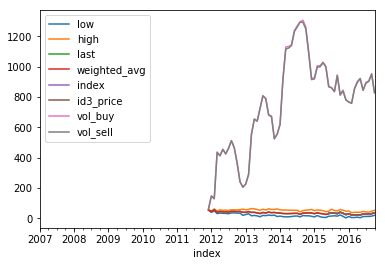

In [100]:
all_prices_resampled.resample('1M').mean().plot()

So there is a bunch of data missing.

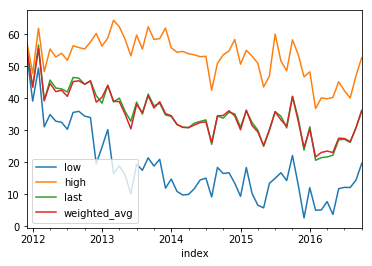

In [79]:
all_prices_resampled.dropna(how='all').resample('1M').mean()[['low', 'high', 'last', 'weighted_avg']].plot()

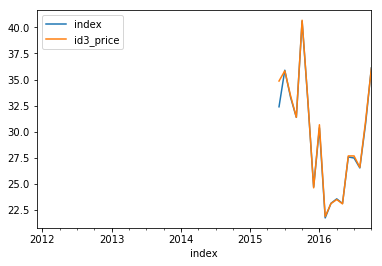

In [82]:
all_prices_resampled[['index',
                        'id3_price']].resample('1M').mean().plot()

In [80]:
all_prices_resampled.dropna(how='all', inplace=True)

In [83]:
all_prices_resampled[['low',
                        'high',
                        'last',
                        'weighted_avg',
                        'index',
                        'id3_price']] = all_prices_resampled[['low',
                                            'high',
                                            'last',
                                            'weighted_avg',
                                            'index',
                                            'id3_price']].applymap(lambda x: x/1000.)

In [84]:
all_prices_resampled

low    high    last  weighted_avg     index  \
index                                                                 
2011-12-14 13:00:00  0.0490  0.0570  0.0570      0.050615       NaN   
2011-12-14 13:30:00  0.0490  0.0650  0.0650      0.057000       NaN   
2011-12-14 14:00:00  0.0620  0.0640  0.0640      0.063000       NaN   
2011-12-14 14:30:00  0.0480  0.0640  0.0480      0.060280       NaN   
2011-12-14 16:00:00  0.0700  0.0700     NaN      0.070000       NaN   
2011-12-14 16:30:00  0.0750  0.0750     NaN      0.075000       NaN   
2011-12-14 17:00:00  0.0900  0.0900  0.0900      0.090000       NaN   
2011-12-14 17:30:00  0.0850  0.0900  0.0850      0.089000       NaN   
2011-12-14 18:00:00  0.0850  0.0850  0.0850      0.085000       NaN   
2011-12-14 18:30:00  0.0850  0.0850  0.0850      0.085000       NaN   
2011-12-15 07:00:00  0.0550  0.0550     NaN      0.055000       NaN   
2011-12-15 07:30:00  0.0870  0.0980  0.0980      0.092335       NaN   
2011-12-15 08:00:00  0.0750  0.0750  0.0750      0.075000       NaN   
2011-12-15 08:30:00  0.0750  0.0750  0.0750      0.075000       NaN   
2011-12-15 09:00:00  0.0725  0.0725     NaN      0.072500       NaN   
2011-12-15 09:30:00  0.0660  0.0660  0.0660      0.066000       NaN   
2011-12-15 11:00:00  0.0800  0.0800  0.0800      0.080000       NaN   
2011-12-15 11:30:00  0.0800  0.0800  0.0800      0.080000       NaN   
2011-12-15 14:00:00  0.0500  0.0500  0.0500      0.050000       NaN   
2011-12-15 15:30:00  0.0550  0.0550  0.0550      0.055000       NaN   
2011-12-16 13:30:00  0.0150  0.0200  0.0150      0.018330       NaN   
2011-12-16 14:00:00  0.0260  0.0260  0.0260      0.026000       NaN   
2011-12-16 14:30:00  0.0150  0.0260  0.0150      0.020500       NaN   
2011-12-16 15:30:00  0.0450  0.0450  0.0450      0.045000       NaN   
2011-12-16 16:00:00  0.0680  0.0680  0.0680      0.068000       NaN   
2011-12-16 16:30:00  0.0000  0.0750  0.0000      0.048500       NaN   
2011-12-17 07:30:00  0.0500  0.0500  0.0500      0.050000       NaN   
2011-12-19 09:30:00  0.0550  0.0550  0.0550      0.055000       NaN   
2011-12-19 10:30:00  0.0550  0.0550  0.0550      0.055000       NaN   
2011-12-19 11:00:00  0.0700  0.0790  0.0790      0.070750       NaN   
...                     ...     ...     ...           ...       ...   
2016-10-23 09:00:00  0.0183  0.0506  0.0352      0.038240  0.038240   
2016-10-23 09:30:00  0.0282  0.0500  0.0369      0.035665  0.035665   
2016-10-23 10:00:00  0.0350  0.0470  0.0365      0.039325  0.039325   
2016-10-23 10:30:00  0.0279  0.0542  0.0373      0.038720  0.038720   
2016-10-23 11:00:00  0.0339  0.0570  0.0501      0.046755  0.046755   
2016-10-23 11:30:00  0.0271  0.0520  0.0479      0.041550  0.041550   
2016-10-23 12:00:00  0.0336  0.0570  0.0500      0.047905  0.047905   
2016-10-23 12:30:00  0.0176  0.0400  0.0344      0.034810  0.034810   
2016-10-23 13:00:00  0.0291  0.0470  0.0330      0.038325  0.038325   
2016-10-23 13:30:00  0.0233  0.0440  0.0280      0.033300  0.033300   
2016-10-23 14:00:00  0.0140  0.0437  0.0327      0.031295  0.031295   
2016-10-23 14:30:00  0.0249  0.0406  0.0357      0.030440  0.030440   
2016-10-23 15:00:00  0.0210  0.0410  0.0390      0.028860  0.028860   
2016-10-23 15:30:00  0.0321  0.0451  0.0394      0.038835  0.038835   
2016-10-23 16:00:00  0.0200  0.0415  0.0301      0.028600  0.028600   
2016-10-23 16:30:00  0.0311  0.0550  0.0470      0.045370  0.045370   
2016-10-23 17:00:00  0.0222  0.0380  0.0378      0.030955  0.030955   
2016-10-23 17:30:00  0.0305  0.0490  0.0340      0.041010  0.041010   
2016-10-23 18:00:00  0.0169  0.0539  0.0400      0.042370  0.042370   
2016-10-23 18:30:00  0.0305  0.0529  0.0341      0.038450  0.038450   
2016-10-23 19:00:00  0.0270  0.0530  0.0291      0.045240  0.045240   
2016-10-23 19:30:00  0.0230  0.0500  0.0320      0.035045  0.035045   
2016-10-23 20:00:00  0.0250  0.0541  0.0288      0.033290  0.033290   
2016-10-23 20:30:00  0.0056  0.0398  0.0189     

In [85]:
all_prices_resampled.to_csv('../data/processed/prices/epexspotde.csv')

In [86]:
all_prices_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80966 entries, 2011-12-14 13:00:00 to 2016-10-23 23:30:00
Data columns (total 8 columns):
low             80965 non-null float64
high            80965 non-null float64
last            80504 non-null float64
weighted_avg    80965 non-null float64
index           23852 non-null float64
id3_price       23180 non-null float64
vol_buy         80965 non-null float64
vol_sell        80965 non-null float64
dtypes: float64(8)
memory usage: 5.6 MB


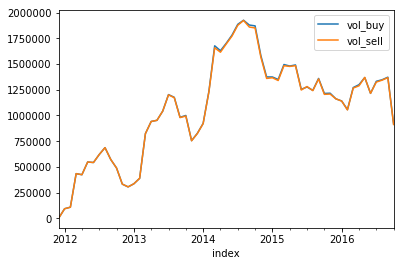

In [88]:
all_prices_resampled[['vol_buy', 'vol_sell']].resample('1M').sum().plot()